<a href="https://colab.research.google.com/github/raghunandepu/Tensorflow2.0_practice/blob/master/4_Predict_House_Prices_using_ANNs_(Regression_Task)_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/0/04/Enlisted_Housing%2C_Fort_Belvior.jpg"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. House Price Predictions
  </td></tr>
</table>






---

* Dataset includes house sale prices for King County in USA. 
* Homes that are sold in the time period: May, 2014 and May, 2015.
* Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction
* Columns:

> 1. ida: notation for a house
2. date: Date house was sold
3. price: Price is prediction target
4. bedrooms: Number of Bedrooms/House
5. bathrooms: Number of bathrooms/House
6. sqft_living: square footage of the home
7. sqft_lot: square footage of the lot
8. floors: Total floors (levels) in house
9. waterfront: House which has a view to a waterfront
10. view: Has been viewed
11. condition: How good the condition is ( Overall )
12. grade: overall grade given to the housing unit, based on King County grading system
13. sqft_abovesquare: footage of house apart from basement
14. sqft_basement: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. sqft_living15: Living room area in 2015(implies-- some renovations) 
21. sqft_lot15: lotSize area in 2015(implies-- some renovations)




---








# STEP #0: IMPORT LIBRARIES

In [1]:
!pip install tensorflow-gpu==2.0.0.alpha0
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

     |████████████████████████████████| 332.1MB 50kB/s 
     |████████████████████████████████| 419kB 33.7MB/s 
     |████████████████████████████████| 3.0MB 30.5MB/s 


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

# STEP #1: IMPORT DATASETS

In [2]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# You have to include the full link to the csv file containing your dataset
house_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kc-house-data.csv', encoding = 'ISO-8859-1')


In [5]:
house_df

id             date  ...  sqft_living15  sqft_lot15
0      7129300520  20141013T000000  ...           1340        5650
1      6414100192  20141209T000000  ...           1690        7639
2      5631500400  20150225T000000  ...           2720        8062
3      2487200875  20141209T000000  ...           1360        5000
4      1954400510  20150218T000000  ...           1800        7503
...           ...              ...  ...            ...         ...
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[21613 rows x 21 columns]

In [6]:
house_df.head(3)

id             date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0  ... -122.257           1340        5650
1  6414100192  20141209T000000  538000.0  ... -122.319           1690        7639
2  5631500400  20150225T000000  180000.0  ... -122.233           2720        8062

[3 rows x 21 columns]

In [7]:
house_df.tail(5)

id             date  ...  sqft_living15  sqft_lot15
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[5 rows x 21 columns]

In [8]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [11]:
house_df.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.400881e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.671272e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

# STEP #2: VISUALIZE DATASET

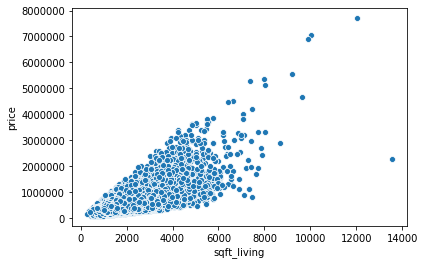

In [12]:
sns.scatterplot(house_df['sqft_living'], house_df['price'])

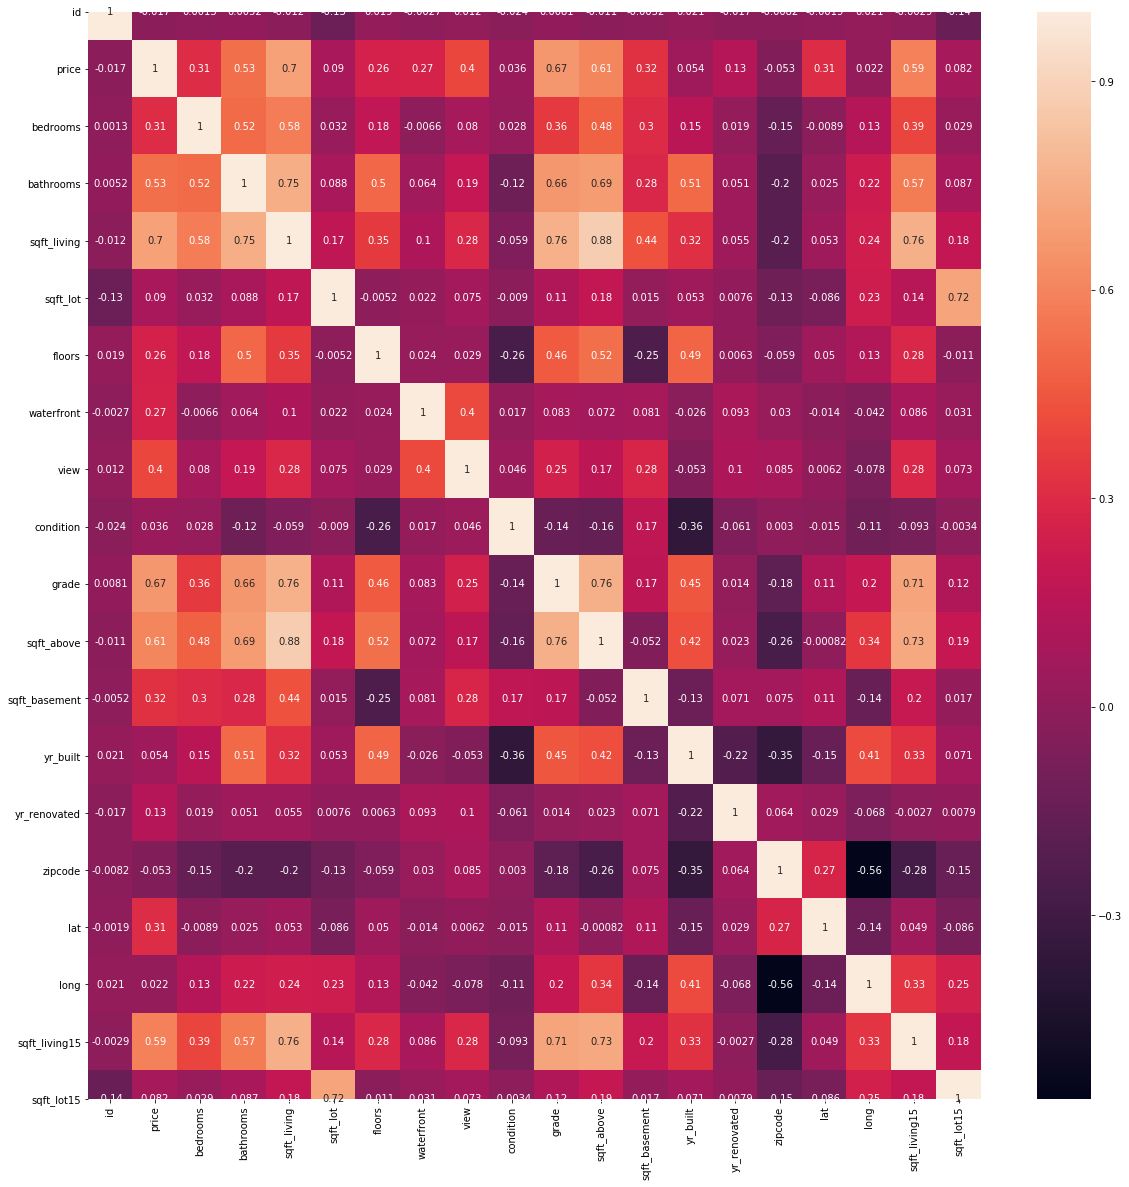

In [14]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(house_df.corr(), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c207a5cf8>,
      dtype=object)

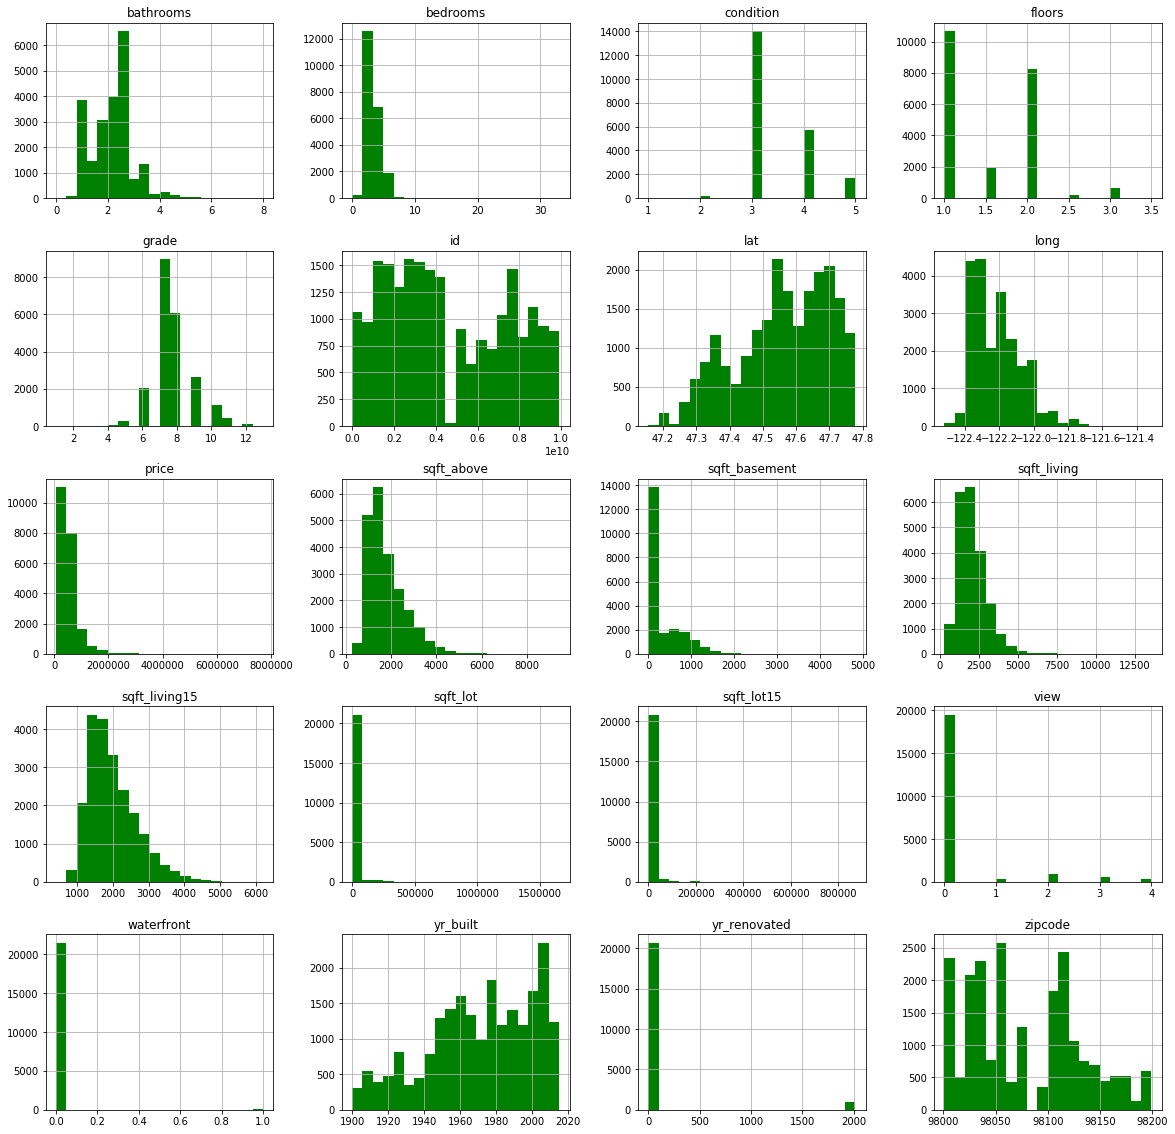

In [15]:
house_df.hist(bins=20, figsize=(20,20), color = 'g')

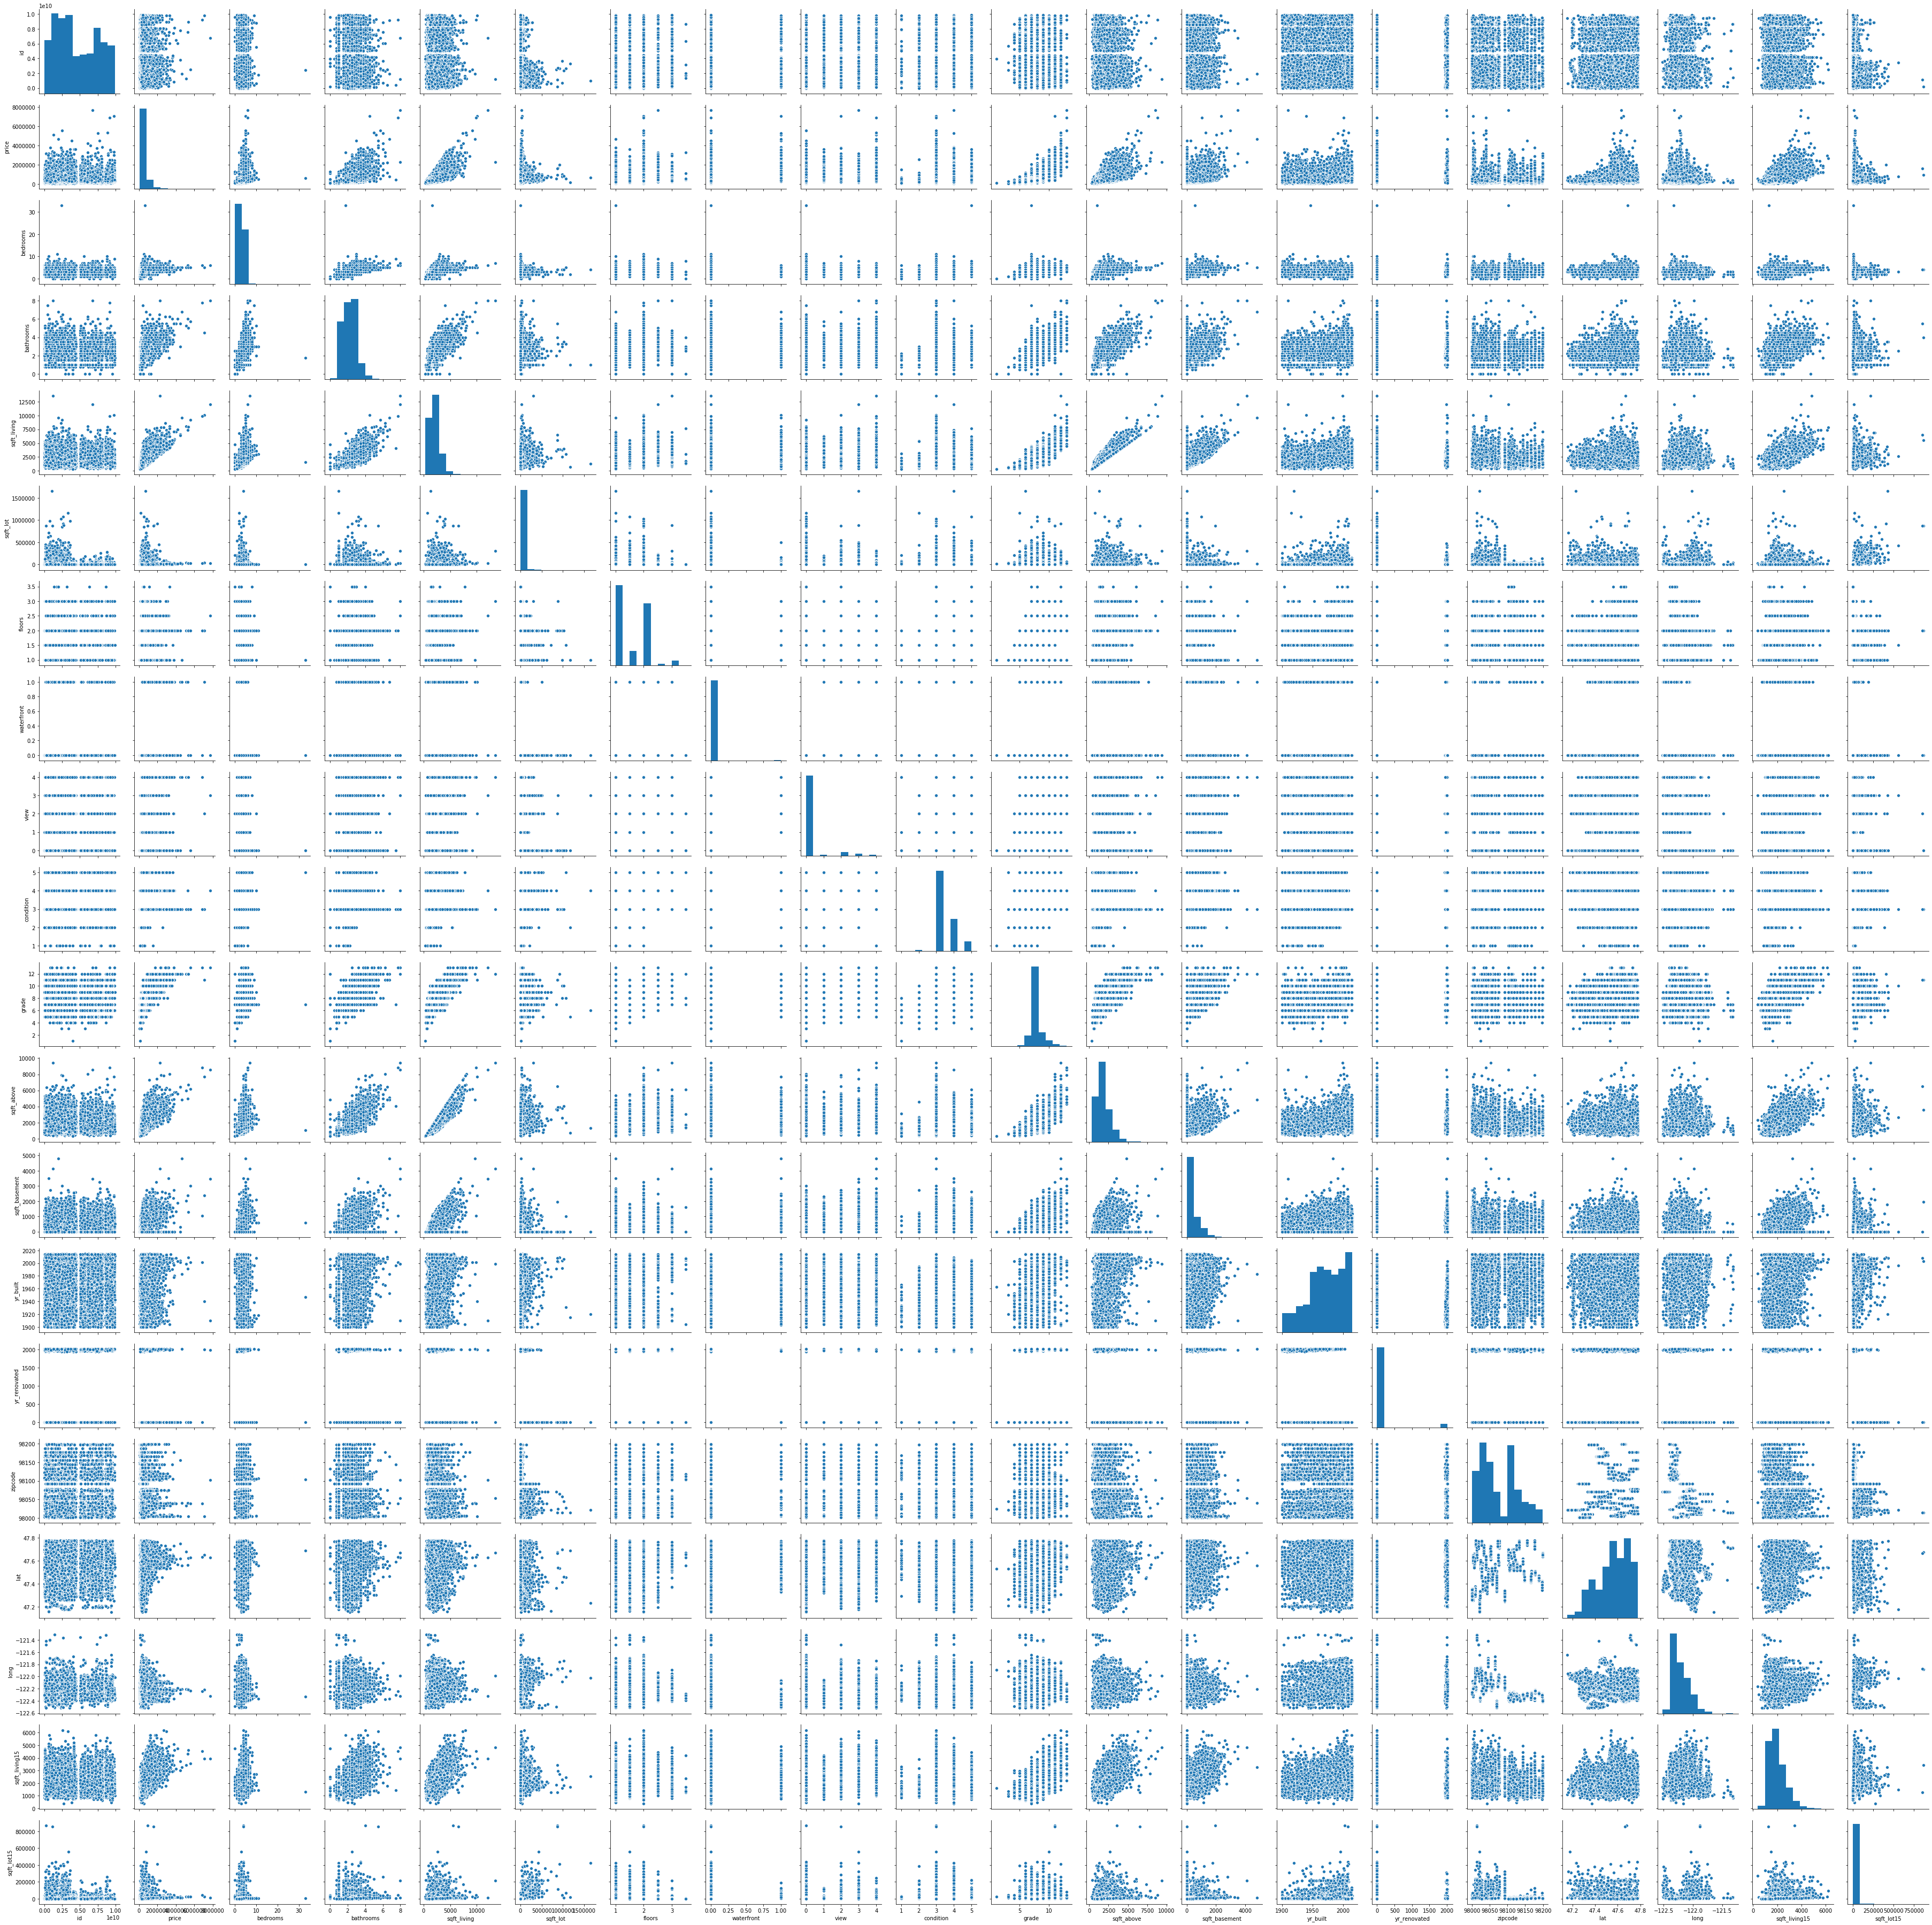

In [16]:
sns.pairplot(house_df)

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [0]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [0]:
X = house_df[selected_features]

In [19]:
X

bedrooms  bathrooms  sqft_living  ...  floors  sqft_above  sqft_basement
0             3       1.00         1180  ...     1.0        1180              0
1             3       2.25         2570  ...     2.0        2170            400
2             2       1.00          770  ...     1.0         770              0
3             4       3.00         1960  ...     1.0        1050            910
4             3       2.00         1680  ...     1.0        1680              0
...         ...        ...          ...  ...     ...         ...            ...
21608         3       2.50         1530  ...     3.0        1530              0
21609         4       2.50         2310  ...     2.0        2310              0
21610         2       0.75         1020  ...     2.0        1020              0
21611         3       2.50         1600  ...     2.0        1600              0
21612         2       0.75         1020  ...     2.0        1020              0

[21613 rows x 7 columns]

In [0]:
y = house_df['price']

In [21]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [22]:
X.shape

(21613, 7)

In [23]:
y.shape

(21613,)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [26]:
X_scaled.shape

(21613, 7)

In [28]:
scaler.data_max_

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [30]:
scaler.data_min_

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [0]:
y = y.values.reshape(-1,1)

In [0]:
y_scaled = scaler.fit_transform(y)

In [33]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

# STEP#4: TRAINING THE MODEL

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [35]:
X_train.shape

(16209, 7)

In [36]:
y_train.shape

(16209, 1)

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(7,)))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear')) # activation is linear as this is regression problem

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               800       
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [41]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size=50, validation_split=0.2)

Train on 12967 samples, validate on 3242 samples
Epoch 1/100
12967/12967 [==============================] - 2s 177us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 2/100
12967/12967 [==============================] - 1s 108us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 3/100
12967/12967 [==============================] - 1s 107us/sample - loss: 0.0010 - val_loss: 0.0012
Epoch 4/100
12967/12967 [==============================] - 1s 108us/sample - loss: 0.0010 - val_loss: 0.0011
Epoch 5/100
12967/12967 [==============================] - 1s 106us/sample - loss: 9.8771e-04 - val_loss: 0.0012
Epoch 6/100
12967/12967 [==============================] - 1s 115us/sample - loss: 9.9829e-04 - val_loss: 0.0012
Epoch 7/100
12967/12967 [==============================] - 1s 110us/sample - loss: 9.8631e-04 - val_loss: 0.0011
Epoch 8/100
12967/12967 [==============================] - 1s 110us/sample - loss: 0.0010 - val_loss: 0.0011
Epoch 9/100
12967/12967 [==============================] - 1s 112us

# STEP#5: EVALUATING THE MODEL 

In [42]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

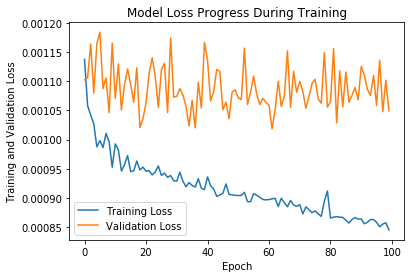

In [43]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [45]:
# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'
X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)

y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

array([[211923.89]], dtype=float32)

Text(0, 0.5, 'True Values')

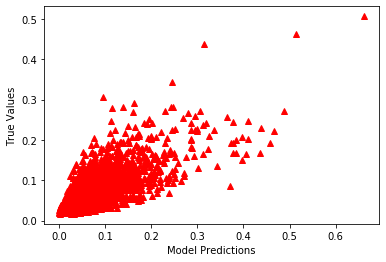

In [44]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [0]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

(0, 3000000)

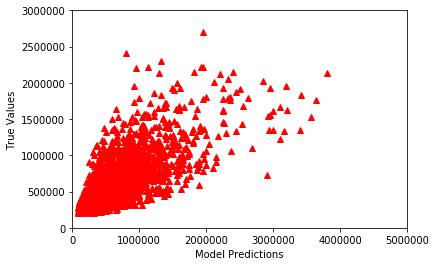

In [48]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [49]:
k = X_test.shape[1]
n = len(X_test)
n

5404

RMSE = 237328.895 
MSE = 56325004260.07512 
MAE = 158060.02626815785 
R2 = 0.5782390929145498 
Adjusted R2 = 0.5776919605295241


In [50]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 233421.68 
MSE = 54485680916.77919 
MAE = 151609.6475903266 
R2 = 0.5764855164100884 
Adjusted R2 = 0.5759361091852683


The model is not performing well as R2 is just 57% and RMSE is very large. This is because of less number of features/independent variables selected.

# LET'S INCREASE THE NUMBER OF FEATURES (INDEPENDANT VARIABLES) AND RETRAIN THE EXACT SAME MODEL

In [0]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [0]:
y = house_df['price']

In [0]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(19, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [0]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [57]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Train on 12967 samples, validate on 3242 samples
Epoch 1/100
12967/12967 [==============================] - 2s 127us/sample - loss: 9.2498e-04 - val_loss: 5.0120e-04
Epoch 2/100
12967/12967 [==============================] - 1s 106us/sample - loss: 5.0915e-04 - val_loss: 4.6014e-04
Epoch 3/100
12967/12967 [==============================] - 1s 109us/sample - loss: 4.5347e-04 - val_loss: 4.1649e-04
Epoch 4/100
12967/12967 [==============================] - 1s 110us/sample - loss: 4.0927e-04 - val_loss: 4.3077e-04
Epoch 5/100
12967/12967 [==============================] - 1s 108us/sample - loss: 3.8869e-04 - val_loss: 3.8734e-04
Epoch 6/100
12967/12967 [==============================] - 1s 110us/sample - loss: 3.7243e-04 - val_loss: 3.7026e-04
Epoch 7/100
12967/12967 [==============================] - 1s 108us/sample - loss: 3.6145e-04 - val_loss: 3.3727e-04
Epoch 8/100
12967/12967 [==============================] - 1s 107us/sample - loss: 3.4225e-04 - val_loss: 3.7715e-04
Epoch 9/100
129

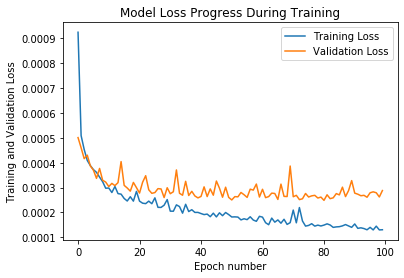

In [58]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

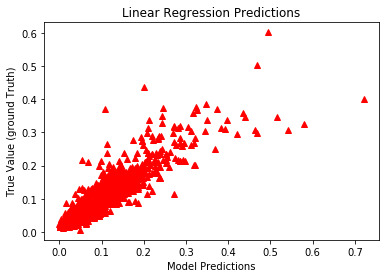

In [59]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [0]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 146686.883 
MSE = 21517041788.97627 
MAE = 87852.01876503516 
R2 = 0.8359111462662194 
Adjusted R2 = 0.8356982808147486


# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS